# Facebook API practice

### B05901180 電機系二年級 趙冠豪
### Timestamp : 2018/3/24

## Use facebook api to link to my account

In [1]:
#先把需要的package執行看存不存在
library(httr)
library(rjson)
library(httpuv)
library(Rfacebook)


Attaching package: ‘Rfacebook’

The following object is masked from ‘package:methods’:

    getGroup



In [2]:
library(plyr)
library(nlr)


Attaching package: ‘nlr’

The following object is masked from ‘package:base’:

    transform



In [3]:
token <- "EAACEdEose0cBAOyMh4jDcwy0qxO2mKP4CriYzYoZAjJQm37C22WiZC1eQlhiCvyjjCfdZCZAGZAMGFHMlUneSxaBhdj03TCdy35ZCQoWbG9kypLZC9qiA99B47VJEKZCVr4xzzpLSlS9IZAOxQIXSkmycjpTGbkM36ughHZCKD6QJWvVSz4BUefrtt7pMLmv8nY5ouHvkA2kUDMAZDZD"
prefex_post <- "https://graph.facebook.com/v2.12/me/?fields=posts&access_token="
url <- paste0(prefex_post, token)
# Get the response of the url (ex. posts)
res <- httr::GET(url)
# Get the content of the url
posts <- content(res)

In [4]:
res

Response [https://graph.facebook.com/v2.12/me/?fields=posts&access_token=EAACEdEose0cBAOyMh4jDcwy0qxO2mKP4CriYzYoZAjJQm37C22WiZC1eQlhiCvyjjCfdZCZAGZAMGFHMlUneSxaBhdj03TCdy35ZCQoWbG9kypLZC9qiA99B47VJEKZCVr4xzzpLSlS9IZAOxQIXSkmycjpTGbkM36ughHZCKD6QJWvVSz4BUefrtt7pMLmv8nY5ouHvkA2kUDMAZDZD]
  Date: 2018-03-28 16:02
  Status: 200
  Content-Type: application/json; charset=UTF-8
  Size: 5.96 kB


### Get my History Post

In [5]:
for( x in 1:16){
    print(posts$posts$data[[x]]$message)
}

NULL
NULL
[1] "太久沒換惹\U0001f602\n一張去年聖誕節的燦笑\U0001f602\U0001f602"
[1] "#電機之夜 #大一舞 #hiphop #帥一波"
[1] "第二年的電夜 林承德我會幫你好好上課"
NULL
NULL
[1] "翻翻手機照片開始懷疑我到底是不是建中的ＸＤ\n建中生是多麼不喜歡穿制服\n好不容易找到的一張制服照片ＸＤ"
[1] "笑爛"
[1] "#小福廣場\n#10月16到10月20號\n#2017台大電機週frEEstyle"
NULL
[1] "超級罩的永松和承德\nJack Chuang不用修簡報課就超電\U0001f64f\U0001f64f\n之後黑客松再衝一波\U0001f4aa\U0001f3fc\n\n#2017wcit #smartbell"
[1] "歡迎大家來探班\n聽說入場費20000元\n值班囉\n#2017WCIT"
[1] "https://www.youtube.com/watch?v=55aEVvITNJ0"
NULL
[1] "一年過了\n也許這一年很多事變了\n但聚在一起那種熟悉懷念的感覺依舊\n會讓人想起高中三年的種種\n各種肆無忌憚因為預繳錢的亂吃\n各種秀下限沒有極限的ㄎㄧㄤˉ\n各種感情上的審問大公開、逼供桌\n各種把妹小技巧的共筆\n各種南部人北部人的互嘴、種田騎山豬\n各種深夜吵雜的談心佐酒\n\n開始想念起指考前那段打球玩肚子衝刺的日子\n開始想念起高中下課打各種小遊戲的耍廢時間\n開始想念起穿著那身制服的感覺\n\n第一年 沒變的還是這些熟悉溫暖的幹話\n好像又回到了326\n歐不已經是426了\n#第一年 #326 #高中同學會"


## Get my name

In [6]:
me <- getUsers("me", token, private_info = TRUE)
me$name

[1] "Howard Chao"

## Get the page I liked

In [11]:
prefex_me <- "https://graph.facebook.com/v2.12/dXNlcl9jb250ZAXh0OgGQNe5zws7pL4orKZAUj0IozaP2PZBPencXCNLENCnWXnhavvE0BZBI7yRH8keorFJRghjVfeePOzljewhIqICEeD1byr9snTuZAmGuqtj93DzuJ9AZD/mutual_likes?pretty=0&limit=25&after=MTM5MDU4NTE5NDU3NDAxNwZDZD&access_token="
url_me <- paste0(prefex_me, token)
# Get the response of the url (ex. posts)
res_me <- httr::GET(url_me)
# Get the content of the url
posts_me <- content(res_me)

In [12]:
data_list <- vector()

In [13]:
for(x in 1:25){
    data_list <- c(data_list, posts_me$data[[x]]$name)
}
a <- data.frame(data_list)
colnames(a) <- c("Liked paged")
url_next <- posts_me$paging$`next`
res_next <- httr::GET(url_next)
posts_me <- content(res_next)

In [14]:
a

Liked paged
Facebook Careers
Yahoo! intern
資策會
Brain-Magnet 學生企業實習平台
微軟實習 未來生涯體驗計劃 Microsoft Intern Program
CIEE Taiwan Fans Club
We Student Internship matching
NTU Toastmasters 台大國際英語演講社
HackMD
Data Skeptic Podcast


## Get 朱立倫's posts from 2015-11-01 to 2016-1-17

### aim : what is the issue he care about when he was running for presidency

In [23]:
token <- "EAACEdEose0cBAOyMh4jDcwy0qxO2mKP4CriYzYoZAjJQm37C22WiZC1eQlhiCvyjjCfdZCZAGZAMGFHMlUneSxaBhdj03TCdy35ZCQoWbG9kypLZC9qiA99B47VJEKZCVr4xzzpLSlS9IZAOxQIXSkmycjpTGbkM36ughHZCKD6QJWvVSz4BUefrtt7pMLmv8nY5ouHvkA2kUDMAZDZD"
prefex_post <- "https://graph.facebook.com/v2.12/10150145806225128/posts?limit=1&until=2016-1-17&since=2015-11-01&access_token="
url <- paste0(prefex_post, token)
# Get the response of the url (ex. posts)
res <- httr::GET(url)
# Get the content of the url
posts <- httr::content(res)

In [35]:
# to check url
url

[1] "https://graph.facebook.com/v2.12/10150145806225128/posts?limit=1&until=2016-1-17&since=2015-11-01&after=Q2c4U1pXNTBYM0YxWlhKNVgzTjBiM0o1WDJsa0R5VXhNREUxTURFME5UZA3dOakl5TlRFeU9EbzBPVEEzTWpNMk5qVXdOVGc0TkRFNU5EUXdEd3hoY0dsZAmMzUnZAjbmxmYVdRUEl6RXdNVFV3TVRRMU9EQTJNakkxTVRJNFh6RXdNVFUyTWpnMk56TXlNVEl3TVRJNER3UjBhVzFsQmxZAMXRsVUIZD&access_token=EAACEdEose0cBAOyMh4jDcwy0qxO2mKP4CriYzYoZAjJQm37C22WiZC1eQlhiCvyjjCfdZCZAGZAMGFHMlUneSxaBhdj03TCdy35ZCQoWbG9kypLZC9qiA99B47VJEKZCVr4xzzpLSlS9IZAOxQIXSkmycjpTGbkM36ughHZCKD6QJWvVSz4BUefrtt7pMLmv8nY5ouHvkA2kUDMAZDZD"

In [25]:
# to check whether the link is valid
res

Response [https://graph.facebook.com/v2.12/10150145806225128/posts?limit=1&until=2016-1-17&since=2015-11-01&access_token=EAACEdEose0cBAOyMh4jDcwy0qxO2mKP4CriYzYoZAjJQm37C22WiZC1eQlhiCvyjjCfdZCZAGZAMGFHMlUneSxaBhdj03TCdy35ZCQoWbG9kypLZC9qiA99B47VJEKZCVr4xzzpLSlS9IZAOxQIXSkmycjpTGbkM36ughHZCKD6QJWvVSz4BUefrtt7pMLmv8nY5ouHvkA2kUDMAZDZD]
  Date: 2018-03-28 16:05
  Status: 200
  Content-Type: application/json; charset=UTF-8
  Size: 11 kB


In [27]:
# convert posts data into
# unlist(given a list structure, simplifies it to produce a vector contains 
#   all the atomic components with occurs in x)
groups <- matrix(unlist(posts$data))

In [28]:
groups

2016-01-16T11:51:30+0000
對不起，朱立倫讓各位失望了！我們敗選了，國民黨敗選了，我們努力不夠，我們辜負了選民的期望，我們辜負了對國家的責任! 身為黨主席，身為黨的總統參選人，責無旁貸，要負起最大的責任，我即刻辭去黨主席的職務，徹底自我檢討，自我反省，但我不會放棄我對國民黨的信心，對國家對社會對選民的信心。 恭賀蔡英文主席，恭賀民進黨贏得選舉。這是台灣人民的選擇，也是台灣人民對蔡主席、對民進黨的責任的託付，我深切的祝福蔡主席與民進黨，能在勝選之後，帶領中華民國，帶領台灣，走向更幸福，更美好的未來。 更要恭賀所有選民，選民才是最大贏家，是選民讓我們朝野政黨，知道了民意的依歸，民意的動向。 我們國民黨，必定會記取這次大選，我們所遭到的嚴重挫敗。除了深切的反躬自省，傾聽選票所透露出的民意訊息外，國民黨也必當扮演好，反對黨的角色，監督的力量。 國民黨敗選了，但做為在野的反對黨，做為政治上的監督者，我們也必當在未來扮演好反對的聲音，監督的力量，但請大家放心，我們會做忠誠的反對黨，我們會做體察民意，反映民意的監督者。一切發乎善意，一切出自真誠的愛台灣之心！ 台灣，只有一個，我在選前這樣相信，我在選後依舊這樣相信。 選舉的時候，政黨依據不同的理念，不同的價值，可以激烈競爭，但選後，只有一個執政黨，只有一個政府，我們要尊重選民的抉擇，我們要相信民主的機制，選後，台灣依舊只有一個，做為在野的反對黨，國民黨必須誠懇的反省，何以人民做了這樣的選擇 ! 何以我們執政了近八年，會再度成為在野黨？ 如果我們反省的方向不對，如果我們反省的深度不夠，那四年後，國民黨依舊沒有資格說 : 我們可以再起 ! 我們還有機會 ! 我知道，此刻，所有支持我們的民眾，內心是悲痛的，情感是受創的，但我要告訴各位，我們沒有遲疑、悲觀的權利。從現在起，我們就要開始認真的思索：為什麼？怎麼做？往哪裡去？ 過去幾年，為什麼民意有了巨大的轉變？為什麼，國民黨對民意的體察，有那麼大的落差？我們的政策主張，我們的用人方式，我們與社會溝通連結的語言和姿態，是不是都出現了大問題？為什麼我們的反省檢討，不能徹底，不能落實？ 失去中央執政，再失去國會多數，這是國民黨史無前例的巨變。其實從前年底的九合一選舉，國民黨失去多數的地方執政，就已經顯露了我們所面臨的巨大危機。如果此時此刻，是質問我們該怎麼做的最好時機，那我必須說，從地方開始扎根，從地方基層開始徹底培養人才，透過一次次的選舉，讓我們的未來人才、未來領袖，從基層開始培養起，進入國會，進入政府，才是『浴火重生』的唯一出路！也是我們國民黨爭取民意認同的，從根做起的唯一機會！ 民進黨執政，我們誠懇祝福。不過，政黨政治，就是不同政策，不同理念的競爭。我們國民黨，對中華民國，對台灣的發展藍圖，確實有跟民進黨不一樣的區隔。 雖然這次選舉我們輸了，然而，對國家未來發展的大方向，我們依舊有責任，對新政府，對執政黨表達我們的關切，以及我們的憂心。這是一個負責任的在野政黨，必須要做的。台灣往哪裡走？不止是一個政黨的事，而是二千三百萬台灣人共同的事！國民黨雖然輸了選舉，但不會輸掉我們對台灣的愛，對中華民國的愛！ 這是我可以對所有選民做出的承諾。 我感恩最後關頭，仍對國民黨不棄不離的選民朋友，是你們支撐了我們奮戰的勇氣！對於始終沉默不語的選民朋友，是你們激勵了我們不斷的反省不斷的自我批判。對於沒有投票給我們的選民朋友，是你們激發了我們必須徹頭徹尾的檢討，是你們給了我們繼續改革，繼續求變，爭取四年後重新再起的動力！ 選舉結束了。今晚以後，勝選的要扛起責任，敗選的要衷心祝福，自我惕勵。 台灣的民主，是華人社會的驕傲，我很珍惜這次的參選，我再次的感謝大家，共同完成一次台灣民主史上的壯舉。 選舉有輸贏，台灣的未來，則不能輸，必須贏。 國民黨要在谷底扎根，要能浴火重生，要在每一張選票的託付與指責中，重新改變我們的體質，這是我們必須要做的承諾，也是我們的責任。 我們要在谷底仰望天空，思索未來，努力進前。祝福大家。
10150145806225128_10156542710795128


In [29]:
# save the first post into 1.txt
count <- 1
filename <- paste0("data/", count, ".txt")
write.table(groups, filename)

In [30]:
next_page = posts$paging$cursors$after

In [31]:
next_page

[1] "Q2c4U1pXNTBYM0YxWlhKNVgzTjBiM0o1WDJsa0R5VXhNREUxTURFME5UZA3dOakl5TlRFeU9Eb3pORFUyTmpZAek16ZAzNNRGsxTnpVNU5EazFEd3hoY0dsZAmMzUnZAjbmxmYVdRUEl6RXdNVFV3TVRRMU9EQTJNakkxTVRJNFh6RXdNVFUyTlRReU56RXdOemsxTVRJNER3UjBhVzFsQmxhYUxzSUIZD"

In [32]:
next_flg <- posts$paging$`next`

In [33]:
next_flg

[1] "https://graph.facebook.com/v2.12/10150145806225128/posts?access_token=EAACEdEose0cBAOyMh4jDcwy0qxO2mKP4CriYzYoZAjJQm37C22WiZC1eQlhiCvyjjCfdZCZAGZAMGFHMlUneSxaBhdj03TCdy35ZCQoWbG9kypLZC9qiA99B47VJEKZCVr4xzzpLSlS9IZAOxQIXSkmycjpTGbkM36ughHZCKD6QJWvVSz4BUefrtt7pMLmv8nY5ouHvkA2kUDMAZDZD&since=2015-11-01&until=2016-1-17&limit=1&after=Q2c4U1pXNTBYM0YxWlhKNVgzTjBiM0o1WDJsa0R5VXhNREUxTURFME5UZA3dOakl5TlRFeU9Eb3pORFUyTmpZAek16ZAzNNRGsxTnpVNU5EazFEd3hoY0dsZAmMzUnZAjbmxmYVdRUEl6RXdNVFV3TVRRMU9EQTJNakkxTVRJNFh6RXdNVFUyTlRReU56RXdOemsxTVRJNER3UjBhVzFsQmxhYUxzSUIZD"

In [34]:
# iteratively save the posts into number.txt
while(next_flg != 'NULL'){
#     token <<- "EAACEdEose0cBAP29G74zpR497rG3dxRqZCMvWMh9R4QKgW3s0M2MjneBpHu2ibg5WmhWEZA90qTJNirjZBZBpus9NP3F0CUfO4VSinJJkBjqCiuM56DQVeTxezlRlMeF4fBbhAE2zMOrua06qJshw6UfiB78yVJZCAY8mXPNftrJz6FVYlRyKdHhMu92SJ25T7yZAIMcYZCTwZDZD"
    url <- paste0("https://graph.facebook.com/v2.12/10150145806225128/posts?limit=1&until=2016-1-17&since=2015-11-01&after=", next_page, "&access_token=", token)
    # Get the response of the url (ex. posts)
    res <- httr::GET(url)
    # Get the content of the url
    posts <- httr::content(res)
    count <- count + 1
    next_page_data <- matrix(unlist(posts$data))
    next_page <- posts$paging$cursors$after
    next_flg <- posts$paging$`next`
    filename <- paste0("data/", count, ".txt")
    write.table(next_page_data, filename)
}

ERROR: Error in while (next_flg != "NULL") {: 引數長度為零


## Drawing word cloud!!!

In [48]:
library(NLP)
library(tm)
library(jiebaRD)
library(jiebaR)
library(RColorBrewer)
library(wordcloud)
library("corpus")

In [49]:
paste0(getwd(), '/data')

[1] "/Users/Kuan-Hao/Documents/大二下/資料科學程式設計-蔡芸琤 /106-2RSampleCode/week_4/task_4/data/data"

In [50]:
setwd(paste0(getwd(), '/data'))

ERROR: Error in setwd(paste0(getwd(), "/data")): 無法變更工作目錄


In [51]:
filenames <- list.files(getwd(), pattern="*.txt")
files <- lapply(filenames, readLines)
docs <- Corpus(VectorSource(files))

In [52]:
toSpace <- content_transformer(function(x, pattern) {
  return (gsub(pattern, " ", x))}
)

In [53]:
docs <- tm_map(docs,toSpace,"V1")
docs <- tm_map(docs,toSpace,"\n")
docs <- tm_map(docs,toSpace, "1")
docs <- tm_map(docs,toSpace, "的")
docs <- tm_map(docs,toSpace, "及")
docs <- tm_map(docs,toSpace, "為")
docs <- tm_map(docs,toSpace, "是")
docs <- tm_map(docs,toSpace, "在")
docs <- tm_map(docs,toSpace, "[A-Za-z0-9]")
#移除標點符號 (punctuation)
#移除數字 (digits)、空白 (white space)
docs <- tm_map(docs, removePunctuation)
docs <- tm_map(docs, removeNumbers)
docs <- tm_map(docs, stripWhitespace)

In [54]:
mixseg = worker()
# segment <- c("陳菊","布里斯本","高雄","重劃區","合作會","後勁溪")
# new_user_word(mixseg,segment)

In [55]:
jieba_tokenizer=function(d){
  unlist(segment(d[[1]],mixseg))
}

Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = s

“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong'

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font databa

“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font databa

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font databa

“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font databa

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong'

“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font databa

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font databa

“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font databa

“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong'

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong'

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong'

“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font databa

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font databa

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font databa

“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font databa

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong'

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font databa

“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font databa

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong'

“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font databa

“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong'

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font databa

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font databa

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font databa

“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font databa

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt 

“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font databa

“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' 

“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in strheight(words[i], cex = size[i], ...):
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'STSong' not found in PostScript font database”

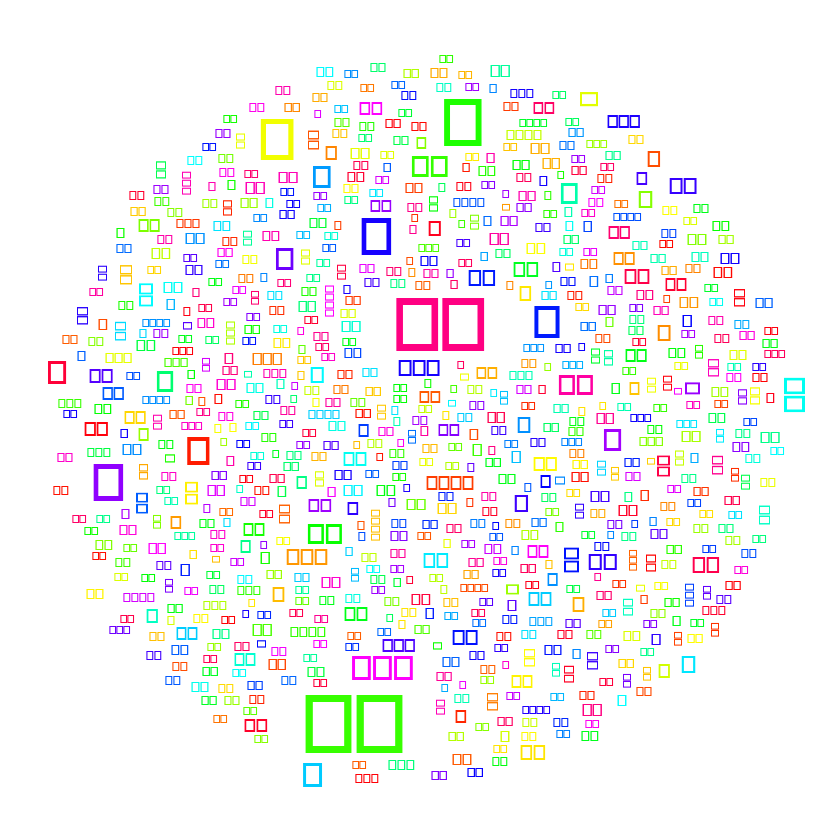

In [56]:
font_family <- par("family") # the previous font family
par(family = "STSong") # change to a nice Chinese font
seg = lapply(docs, jieba_tokenizer)
freqFrame = as.data.frame(table(unlist(seg)))
#畫出文字雲
wordcloud(freqFrame$Var1,freqFrame$Freq,
          min.freq=3,
          random.order=TRUE,random.color=TRUE, 
          rot.per=.1, colors=rainbow(length(row.names(freqFrame))),
          ordered.colors=FALSE,use.r.layout=FALSE,
          fixed.asp=TRUE)

## Some practice and try

In [57]:
mlb <-table(cc[groups])

ERROR: Error in table(cc[groups]): 找不到物件 'cc'


In [58]:
ans = data.frame(mlb)

ERROR: Error in data.frame(mlb): 找不到物件 'mlb'


In [59]:
ans

ERROR: Error in eval(expr, envir, enclos): 找不到物件 'ans'


In [60]:
head(ans[order(ans$Freq, decreasing = TRUE),])

ERROR: Error in head(ans[order(ans$Freq, decreasing = TRUE), ]): 找不到物件 'ans'


In [61]:
library(wordcloud2)

In [62]:
library("corpus")

In [63]:
set.seed(100)

In [64]:
cstops <- "https://raw.githubusercontent.com/ropensci/textworkshop17/master/demos/chineseDemo/ChineseStopWords.txt"
csw <- paste(readLines(cstops, encoding = "UTF-8"), collapse = "\n") # download
csw <- gsub("\\s", "", csw)           # remove whitespace
stop_words <- strsplit(csw, ",")[[1]] # extract the comma-separated words

In [65]:
# Create volatile corpora.
docs <- VCorpus(DataframeSource(groups[2]))

ERROR: Error: all(!is.na(match(c("doc_id", "text"), names(x)))) is not TRUE


In [ ]:
inspect(docs)
docs<-tm_map(docs,stripWhitespace)
docs<-tm_map(docs,removeNumbers)
docs<-tm_map(docs,removePunctuation)
docs <- tm_map(docs, toSpace, "的")
docs <- tm_map(docs, toSpace, "年")
docs <- tm_map(docs, toSpace, "我")
docs <- tm_map(docs, toSpace, "有")
docs <- tm_map(docs, toSpace, "了")
docs <- tm_map(docs, toSpace, "是")
docs <- tm_map(docs, toSpace, "很")
docs <- tm_map(docs, toSpace, "都")
docs <- tm_map(docs, toSpace, "在")
docs <- tm_map(docs, toSpace, "和")
docs <- tm_map(docs, toSpace, "他")
docs <- tm_map(docs, toSpace, "為")
docs <- tm_map(docs, toSpace, "跟")
docs <- tm_map(docs, toSpace, "就")
docs <- tm_map(docs, toSpace, "也")
docs <- tm_map(docs, toSpace, "與")
docs <- tm_map(docs, toSpace, "以")
docs <- tm_map(docs, toSpace, "讓")
docs <- tm_map(docs, toSpace, "日")
docs <- tm_map(docs, toSpace, "月")
docs <- tm_map(docs, toSpace, "到")
for(i in seq(docs)){
  docs[[i]]<-gsub('[[:punct:]]', '', docs[[i]])
  docs[[i]]<-gsub("，"," ",docs[[i]])
  docs[[i]]<-gsub("-"," ",docs[[i]])
}

In [ ]:
par(family="Didot")#讓文字顯示成中文
wordcloud(ans$Var1, ans$Freq, min.freq=3, random.order=TRUE,random.color=TRUE, 
          rot.per=.1, colors=rainbow(length(row.names(ans))),
          ordered.colors=FALSE,use.r.layout=FALSE,
          fixed.asp=TRUE)

In [66]:
toSpace <- content_transformer(function(x, pattern) {
  return (gsub(pattern, " ", x))
}

ERROR: Error in parse(text = x, srcfile = src): <text>:4:0: unexpected end of input
2:   return (gsub(pattern, " ", x))
3: }
  ^
